In [1]:

import numpy as np
import pandas as pd

from src import ImageQuant2, load_image, nb_setup, raw_data_path

nb_setup()

%matplotlib widget

In [2]:
# Import quantification model
membg = np.loadtxt("../../data/calibration_mem6.txt")
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
calibration_factor = np.loadtxt("../../data/calibration_constants.txt")[6]

In [3]:
# Import embryos dataframe
df = pd.read_csv("../../data/ph_embryos.csv")
df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)

### Quantify

  0%|                                                                                                                                             | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                    | 1/600 [00:00<05:44,  1.74it/s]

  2%|█▉                                                                                                                                   | 9/600 [00:00<00:35, 16.85it/s]

  3%|███▌                                                                                                                                | 16/600 [00:00<00:20, 28.20it/s]

  4%|█████                                                                                                                               | 23/600 [00:00<00:15, 38.00it/s]

  5%|██████▌                                                                                                                             | 30/600 [00:00<00:12, 45.66it/s]

  6%|████████▏                                                                                                                           | 37/600 [00:01<00:10, 51.76it/s]

  7%|█████████▋                                                                                                                          | 44/600 [00:01<00:09, 56.00it/s]

  8%|███████████▏                                                                                                                        | 51/600 [00:01<00:09, 59.87it/s]

 10%|████████████▊                                                                                                                       | 58/600 [00:01<00:08, 62.16it/s]

 11%|██████████████▎                                                                                                                     | 65/600 [00:01<00:08, 64.03it/s]

 12%|███████████████▊                                                                                                                    | 72/600 [00:01<00:08, 65.28it/s]

 13%|█████████████████▍                                                                                                                  | 79/600 [00:01<00:08, 62.90it/s]

 14%|██████████████████▉                                                                                                                 | 86/600 [00:01<00:07, 64.32it/s]

 16%|████████████████████▍                                                                                                               | 93/600 [00:01<00:07, 64.81it/s]

 17%|█████████████████████▊                                                                                                             | 100/600 [00:02<00:07, 63.60it/s]

 18%|███████████████████████▎                                                                                                           | 107/600 [00:02<00:07, 65.12it/s]

 19%|████████████████████████▉                                                                                                          | 114/600 [00:02<00:07, 65.13it/s]

 20%|██████████████████████████▍                                                                                                        | 121/600 [00:02<00:07, 64.03it/s]

 21%|███████████████████████████▉                                                                                                       | 128/600 [00:02<00:07, 65.09it/s]

 22%|█████████████████████████████▍                                                                                                     | 135/600 [00:02<00:07, 66.09it/s]

 24%|███████████████████████████████                                                                                                    | 142/600 [00:02<00:07, 64.30it/s]

 25%|████████████████████████████████▌                                                                                                  | 149/600 [00:02<00:07, 63.32it/s]

 26%|██████████████████████████████████                                                                                                 | 156/600 [00:02<00:06, 64.36it/s]

 27%|███████████████████████████████████▌                                                                                               | 163/600 [00:03<00:06, 65.00it/s]

 28%|█████████████████████████████████████                                                                                              | 170/600 [00:03<00:06, 65.88it/s]

 30%|██████████████████████████████████████▋                                                                                            | 177/600 [00:03<00:06, 66.86it/s]

 31%|████████████████████████████████████████▏                                                                                          | 184/600 [00:03<00:06, 67.28it/s]

 32%|█████████████████████████████████████████▋                                                                                         | 191/600 [00:03<00:06, 67.31it/s]

 33%|███████████████████████████████████████████▏                                                                                       | 198/600 [00:03<00:05, 67.54it/s]

 34%|████████████████████████████████████████████▊                                                                                      | 205/600 [00:03<00:05, 67.88it/s]

 35%|██████████████████████████████████████████████▎                                                                                    | 212/600 [00:03<00:05, 67.16it/s]

 36%|███████████████████████████████████████████████▊                                                                                   | 219/600 [00:03<00:05, 66.61it/s]

 38%|█████████████████████████████████████████████████▎                                                                                 | 226/600 [00:03<00:05, 67.08it/s]

 39%|██████████████████████████████████████████████████▊                                                                                | 233/600 [00:04<00:05, 67.13it/s]

 40%|████████████████████████████████████████████████████▌                                                                              | 241/600 [00:04<00:05, 68.15it/s]

 42%|██████████████████████████████████████████████████████▎                                                                            | 249/600 [00:04<00:05, 68.62it/s]

 43%|███████████████████████████████████████████████████████▉                                                                           | 256/600 [00:04<00:05, 65.56it/s]

 44%|█████████████████████████████████████████████████████████▍                                                                         | 263/600 [00:04<00:05, 63.40it/s]

 45%|██████████████████████████████████████████████████████████▉                                                                        | 270/600 [00:04<00:05, 61.81it/s]

 46%|████████████████████████████████████████████████████████████▍                                                                      | 277/600 [00:04<00:05, 60.38it/s]

 47%|██████████████████████████████████████████████████████████████                                                                     | 284/600 [00:04<00:05, 59.49it/s]

 48%|███████████████████████████████████████████████████████████████▌                                                                   | 291/600 [00:05<00:05, 60.16it/s]

 50%|█████████████████████████████████████████████████████████████████                                                                  | 298/600 [00:05<00:04, 60.51it/s]

 51%|██████████████████████████████████████████████████████████████████▌                                                                | 305/600 [00:05<00:04, 60.89it/s]

 52%|████████████████████████████████████████████████████████████████████                                                               | 312/600 [00:05<00:04, 61.41it/s]

 53%|█████████████████████████████████████████████████████████████████████▋                                                             | 319/600 [00:05<00:04, 61.90it/s]

 54%|███████████████████████████████████████████████████████████████████████▏                                                           | 326/600 [00:05<00:04, 62.59it/s]

 56%|████████████████████████████████████████████████████████████████████████▋                                                          | 333/600 [00:05<00:04, 63.62it/s]

 57%|██████████████████████████████████████████████████████████████████████████▏                                                        | 340/600 [00:05<00:03, 65.38it/s]

 58%|███████████████████████████████████████████████████████████████████████████▊                                                       | 347/600 [00:05<00:03, 64.55it/s]

 59%|█████████████████████████████████████████████████████████████████████████████▎                                                     | 354/600 [00:05<00:03, 65.21it/s]

 60%|██████████████████████████████████████████████████████████████████████████████▊                                                    | 361/600 [00:06<00:03, 65.79it/s]

 61%|████████████████████████████████████████████████████████████████████████████████▎                                                  | 368/600 [00:06<00:03, 66.42it/s]

 62%|█████████████████████████████████████████████████████████████████████████████████▉                                                 | 375/600 [00:06<00:03, 67.39it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████▍                                               | 382/600 [00:06<00:03, 67.58it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▉                                              | 389/600 [00:06<00:03, 67.14it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████▍                                            | 396/600 [00:06<00:03, 67.67it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████▉                                           | 403/600 [00:06<00:02, 68.06it/s]

 68%|█████████████████████████████████████████████████████████████████████████████████████████▋                                         | 411/600 [00:06<00:02, 68.77it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████▎                                       | 418/600 [00:06<00:02, 69.05it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 425/600 [00:07<00:02, 68.78it/s]

 72%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                    | 432/600 [00:07<00:02, 69.01it/s]

 73%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 439/600 [00:07<00:02, 69.06it/s]

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                 | 446/600 [00:07<00:02, 68.54it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 453/600 [00:07<00:02, 68.72it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 460/600 [00:07<00:02, 67.81it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 467/600 [00:07<00:01, 67.03it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍                           | 474/600 [00:07<00:01, 67.74it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 481/600 [00:07<00:01, 67.63it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 488/600 [00:07<00:01, 66.73it/s]

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 495/600 [00:08<00:01, 67.43it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 502/600 [00:08<00:01, 67.92it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 509/600 [00:08<00:01, 67.92it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 516/600 [00:08<00:01, 68.00it/s]

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 523/600 [00:08<00:01, 68.29it/s]

 88%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 530/600 [00:08<00:01, 68.64it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 537/600 [00:08<00:00, 68.83it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊            | 544/600 [00:08<00:00, 68.73it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 551/600 [00:08<00:00, 69.07it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊         | 558/600 [00:08<00:00, 68.83it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 565/600 [00:09<00:00, 68.96it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 572/600 [00:09<00:00, 68.77it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 579/600 [00:09<00:00, 69.07it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 586/600 [00:09<00:00, 68.79it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 593/600 [00:09<00:00, 68.40it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 68.38it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 62.60it/s]

{1565367567, 1556902036, 1565359132, 1556901937, 1565357105, 1556902453, 1565360309, 1565359415, 1565359289, 1556902969, 1565360954, 1565360828, 1565356990, 1565366847, 1565360705, 1565356740, 1565359558, 1565356359, 1565360584, 1559137737, 1565359689, 1565367111, 1565360221, 1565358687, 1559137889, 1565357282, 1565356899, 1565358564, 1556901861, 1565367659, 1565367278, 1565367023}
{1565367567, 1556902036, 1565359132, 1556901937, 1565357105, 1556902453, 1565360309, 1565359415, 1565359289, 1556902969, 1565360954, 1565360828, 1565356990, 1565366847, 1565360705, 1565356740, 1565359558, 1565356359, 1565360584, 1559137737, 1565359689, 1565367111, 1565360221, 1565358687, 1559137889, 1565357282, 1565356899, 1565358564, 1556901861, 1565367659, 1565367278, 1565367023}


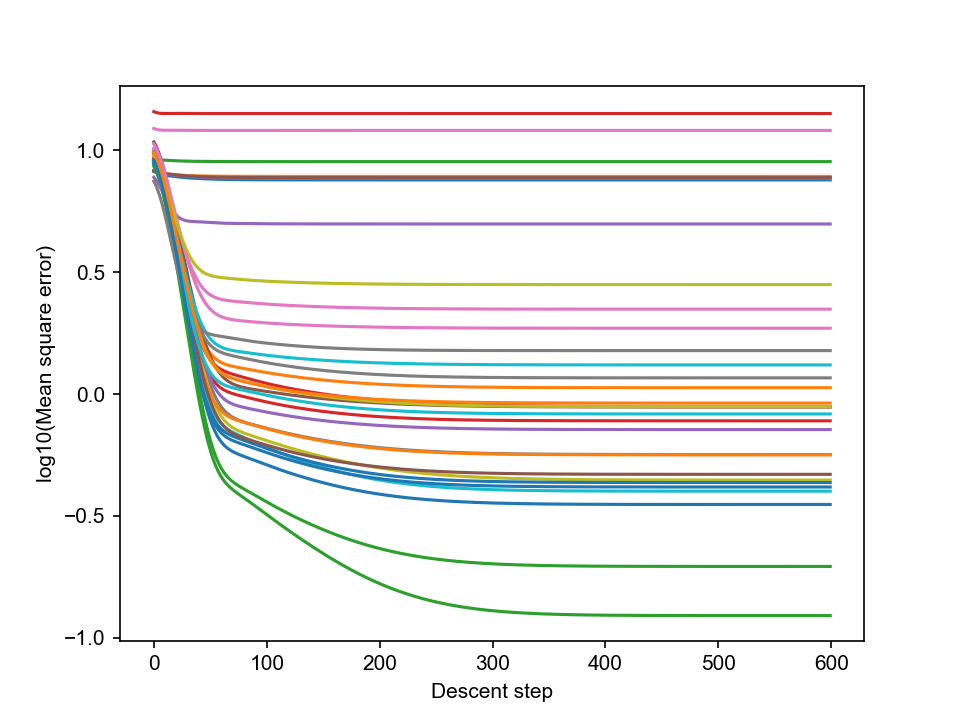

In [4]:
# Import data
paths = df.Path.to_list()
imgs = [load_image(p + "/af_corrected.tif") for p in paths]
rois = [np.loadtxt(p + "/ROI_fit.txt") for p in paths]

# Run quantification
iq = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg)
iq.quantify()

# Plot loss curve
iq.plot_losses(log=True)

# Save results
print(set(df.EmbryoID))
res = iq.compile_res(ids=[str(x) for x in df["EmbryoID"].to_list()])
print(set(res.EmbryoID))
res["Membrane signal"] *= calibration_factor
res.to_csv("../../data/ph_quantification.csv", index=False)